Problem  1: Term - Frequency Inverse Document Frequency  (8 Marks)

Dataset: The TF-IDF dataset (TF-IDF_dataset) file ( text file) has 8 chapters, consider each chapter as a different Document for your reference.

1) You have to implement the Algorithm from scratch.   

2) Calculate the Term Frequency (using TF formula) for all the words found in the Dataset and List top 20 words, which have the highest TF.   (2 Marks)

3) Calculate the Inverse Document Frequency for each word found in the dataset(using IDF formula). List down the top 20 words which has the Highest Inverse Document Frequency and Lowest Inverse Document Frequency.  (3 Marks)

4) Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the dataset and list down the top 10 words which have the highest TF-IDF Value. (3 Marks)

In [228]:
import math
import os
from nltk import sent_tokenize, word_tokenize, PorterStemmer
import nltk

In [229]:
train_text = [
'''Chapter 1

I am by birth a Genevese, and my family is one of the most
distinguished of that republic.  My ancestors had been for many years
counsellors and syndics, and my father had filled several public
situations with honour and reputation.  He was respected by all who
knew him for his integrity and indefatigable attention to public
business.  He passed his younger days perpetually occupied by the
affairs of his country; a variety of circumstances had prevented his
marrying early, nor was it until the decline of life that he became a
husband and the father of a family.

As the circumstances of his marriage illustrate his character, I cannot
refrain from relating them.  One of his most intimate friends was a
merchant who, from a flourishing state, fell, through numerous
mischances, into poverty.  This man, whose name was Beaufort, was of a
proud and unbending disposition and could not bear to live in poverty
and oblivion in the same country where he had formerly been
distinguished for his rank and magnificence.  Having paid his debts,
therefore, in the most honourable manner, he retreated with his
daughter to the town of Lucerne, where he lived unknown and in
wretchedness.  My father loved Beaufort with the truest friendship and
was deeply grieved by his retreat in these unfortunate circumstances.
He bitterly deplored the false pride which led his friend to a conduct
so little worthy of the affection that united them.  He lost no time in
endeavouring to seek him out, with the hope of persuading him to begin
the world again through his credit and assistance.''', 
              
              '''Chapter 2

We were brought up together; there was not quite a year difference in
our ages.  I need not say that we were strangers to any species of
disunion or dispute.  Harmony was the soul of our companionship, and
the diversity and contrast that subsisted in our characters drew us
nearer together.  Elizabeth was of a calmer and more concentrated
disposition; but, with all my ardour, I was capable of a more intense
application and was more deeply smitten with the thirst for knowledge.
She busied herself with following the aerial creations of the poets;
and in the majestic and wondrous scenes which surrounded our Swiss
home —the sublime shapes of the mountains, the changes of the seasons,
tempest and calm, the silence of winter, and the life and turbulence of
our Alpine summers—she found ample scope for admiration and delight.
While my companion contemplated with a serious and satisfied spirit the
magnificent appearances of things, I delighted in investigating their
causes.  The world was to me a secret which I desired to divine.
Curiosity, earnest research to learn the hidden laws of nature,
gladness akin to rapture, as they were unfolded to me, are among the
earliest sensations I can remember.

On the birth of a second son, my junior by seven years, my parents gave
up entirely their wandering life and fixed themselves in their native
country. We possessed a house in Geneva, and a _campagne_ on Belrive,
the eastern shore of the lake, at the distance of rather more than a
league from the city. We resided principally in the latter, and the
lives of my parents were passed in considerable seclusion. It was my
temper to avoid a crowd and to attach myself fervently to a few. I was
indifferent, therefore, to my school-fellows in general; but I united
myself in the bonds of the closest friendship to one among them. Henry
Clerval was the son of a merchant of Geneva. He was a boy of singular
talent and fancy. He loved enterprise, hardship, and even danger for
its own sake. He was deeply read in books of chivalry and romance.  He
composed heroic songs and began to write many a tale of enchantment and
knightly adventure. He tried to make us act plays and to enter into
masquerades, in which the characters were drawn from the heroes of
Roncesvalles, of the Round Table of King Arthur, and the chivalrous
train who shed their blood to redeem the holy sepulchre from the hands
of the infidels. ''',
              '''Chapter 3

When I had attained the age of seventeen my parents resolved that I
should become a student at the university of Ingolstadt.  I had
hitherto attended the schools of Geneva, but my father thought it
necessary for the completion of my education that I should be made
acquainted with other customs than those of my native country.  My
departure was therefore fixed at an early date, but before the day
resolved upon could arrive, the first misfortune of my life
occurred—an omen, as it were, of my future misery.

Elizabeth had caught the scarlet fever; her illness was severe, and she was
in the greatest danger. During her illness many arguments had been urged to
persuade my mother to refrain from attending upon her. She had at first
yielded to our entreaties, but when she heard that the life of her
favourite was menaced, she could no longer control her anxiety. She
attended her sickbed; her watchful attentions triumphed over the malignity
of the distemper—Elizabeth was saved, but the consequences of this
imprudence were fatal to her preserver. On the third day my mother
sickened; her fever was accompanied by the most alarming symptoms, and the
looks of her medical attendants prognosticated the worst event. On her
deathbed the fortitude and benignity of this best of women did not desert
her. She joined the hands of Elizabeth and myself. “My
children,” she said, “my firmest hopes of future happiness were
placed on the prospect of your union. This expectation will now be the
consolation of your father. Elizabeth, my love, you must supply my place to
my younger children. Alas! I regret that I am taken from you; and, happy
and beloved as I have been, is it not hard to quit you all? But these are
not thoughts befitting me; I will endeavour to resign myself cheerfully to
death and will indulge a hope of meeting you in another world.”

''',
'''
Chapter 4

From this day natural philosophy, and particularly chemistry, in the
most comprehensive sense of the term, became nearly my sole occupation.
I read with ardour those works, so full of genius and discrimination,
which modern inquirers have written on these subjects.  I attended the
lectures and cultivated the acquaintance of the men of science of the
university, and I found even in M. Krempe a great deal of sound sense
and real information, combined, it is true, with a repulsive
physiognomy and manners, but not on that account the less valuable.  In
M. Waldman I found a true friend.  His gentleness was never tinged by
dogmatism, and his instructions were given with an air of frankness and
good nature that banished every idea of pedantry.  In a thousand ways
he smoothed for me the path of knowledge and made the most abstruse
inquiries clear and facile to my apprehension.  My application was at
first fluctuating and uncertain; it gained strength as I proceeded and
soon became so ardent and eager that the stars often disappeared in the
light of morning whilst I was yet engaged in my laboratory.

As I applied so closely, it may be easily conceived that my progress
was rapid.  My ardour was indeed the astonishment of the students, and
my proficiency that of the masters.  Professor Krempe often asked me,
with a sly smile, how Cornelius Agrippa went on, whilst M. Waldman
expressed the most heartfelt exultation in my progress.  Two years
passed in this manner, during which I paid no visit to Geneva, but was
engaged, heart and soul, in the pursuit of some discoveries which I
hoped to make.  None but those who have experienced them can conceive
of the enticements of science.  In other studies you go as far as
others have gone before you, and there is nothing more to know; but in
a scientific pursuit there is continual food for discovery and wonder.
A mind of moderate capacity which closely pursues one study must
infallibly arrive at great proficiency in that study; and I, who
continually sought the attainment of one object of pursuit and was
solely wrapped up in this, improved so rapidly that at the end of two
years I made some discoveries in the improvement of some chemical
instruments, which procured me great esteem and admiration at the
university.  When I had arrived at this point and had become as well
acquainted with the theory and practice of natural philosophy as
depended on the lessons of any of the professors at Ingolstadt, my
residence there being no longer conducive to my improvements, I thought
of returning to my friends and my native town, when an incident
happened that protracted my stay.

''',
'''
Chapter 5

It was on a dreary night of November that I beheld the accomplishment
of my toils.  With an anxiety that almost amounted to agony, I
collected the instruments of life around me, that I might infuse a
spark of being into the lifeless thing that lay at my feet.  It was
already one in the morning; the rain pattered dismally against the
panes, and my candle was nearly burnt out, when, by the glimmer of the
half-extinguished light, I saw the dull yellow eye of the creature
open; it breathed hard, and a convulsive motion agitated its limbs.

How can I describe my emotions at this catastrophe, or how delineate
the wretch whom with such infinite pains and care I had endeavoured to
form?  His limbs were in proportion, and I had selected his features as
beautiful.  Beautiful!  Great God!  His yellow skin scarcely covered
the work of muscles and arteries beneath; his hair was of a lustrous
black, and flowing; his teeth of a pearly whiteness; but these
luxuriances only formed a more horrid contrast with his watery eyes,
that seemed almost of the same colour as the dun-white sockets in which
they were set, his shrivelled complexion and straight black lips.

''',
'''
chapter 6

“You have been ill, very ill, and even the constant letters of dear
kind Henry are not sufficient to reassure me on your account.  You are
forbidden to write—to hold a pen; yet one word from you, dear Victor,
is necessary to calm our apprehensions.  For a long time I have thought
that each post would bring this line, and my persuasions have
restrained my uncle from undertaking a journey to Ingolstadt.  I have
prevented his encountering the inconveniences and perhaps dangers of so
long a journey, yet how often have I regretted not being able to
perform it myself!  I figure to myself that the task of attending on
your sickbed has devolved on some mercenary old nurse, who could never
guess your wishes nor minister to them with the care and affection of
your poor cousin.  Yet that is over now:  Clerval writes that indeed
you are getting better.  I eagerly hope that you will confirm this
intelligence soon in your own handwriting.

“Get well—and return to us.  You will find a happy, cheerful home and
friends who love you dearly.  Your father’s health is vigorous, and he
asks but to see you, but to be assured that you are well; and not a
care will ever cloud his benevolent countenance.  How pleased you would
be to remark the improvement of our Ernest!  He is now sixteen and full
of activity and spirit.  He is desirous to be a true Swiss and to enter
into foreign service, but we cannot part with him, at least until his
elder brother returns to us.  My uncle is not pleased with the idea of
a military career in a distant country, but Ernest never had your
powers of application.  He looks upon study as an odious fetter; his
time is spent in the open air, climbing the hills or rowing on the
lake.  I fear that he will become an idler unless we yield the point
and permit him to enter on the profession which he has selected.

''',
'''
Chapter 7


“You have probably waited impatiently for a letter to fix the date of
your return to us; and I was at first tempted to write only a few
lines, merely mentioning the day on which I should expect you.  But
that would be a cruel kindness, and I dare not do it.  What would be
your surprise, my son, when you expected a happy and glad welcome, to
behold, on the contrary, tears and wretchedness?  And how, Victor, can
I relate our misfortune?  Absence cannot have rendered you callous to
our joys and griefs; and how shall I inflict pain on my long absent
son?  I wish to prepare you for the woeful news, but I know it is
impossible; even now your eye skims over the page to seek the words
which are to convey to you the horrible tidings.

“Last Thursday (May 7th), I, my niece, and your two brothers, went to
walk in Plainpalais.  The evening was warm and serene, and we prolonged
our walk farther than usual.  It was already dusk before we thought of
returning; and then we discovered that William and Ernest, who had gone
on before, were not to be found.  We accordingly rested on a seat until
they should return.  Presently Ernest came, and enquired if we had seen
his brother; he said, that he had been playing with him, that William
had run away to hide himself, and that he vainly sought for him, and
afterwards waited for a long time, but that he did not return.

''',
'''
Chapter 8

We passed a few sad hours until eleven o’clock, when the trial was to
commence.  My father and the rest of the family being obliged to attend
as witnesses, I accompanied them to the court.  During the whole of
this wretched mockery of justice I suffered living torture.  It was to
be decided whether the result of my curiosity and lawless devices would
cause the death of two of my fellow beings:  one a smiling babe full of
innocence and joy, the other far more dreadfully murdered, with every
aggravation of infamy that could make the murder memorable in horror.
Justine also was a girl of merit and possessed qualities which promised
to render her life happy; now all was to be obliterated in an
ignominious grave, and I the cause!  A thousand times rather would I
have confessed myself guilty of the crime ascribed to Justine, but I
was absent when it was committed, and such a declaration would have
been considered as the ravings of a madman and would not have
exculpated her who suffered through me.

The appearance of Justine was calm.  She was dressed in mourning, and
her countenance, always engaging, was rendered, by the solemnity of her
feelings, exquisitely beautiful.  Yet she appeared confident in
innocence and did not tremble, although gazed on and execrated by
thousands, for all the kindness which her beauty might otherwise have
excited was obliterated in the minds of the spectators by the
imagination of the enormity she was supposed to have committed.  She
was tranquil, yet her tranquillity was evidently constrained; and as
her confusion had before been adduced as a proof of her guilt, she
worked up her mind to an appearance of courage.  When she entered the
court she threw her eyes round it and quickly discovered where we were
seated.  A tear seemed to dim her eye when she saw us, but she quickly
recovered herself, and a look of sorrowful affection seemed to attest
her utter guiltlessness.
''']

In [230]:
train_text_new = train_text
print(train_text_new)

['Chapter 1\n\nI am by birth a Genevese, and my family is one of the most\ndistinguished of that republic.  My ancestors had been for many years\ncounsellors and syndics, and my father had filled several public\nsituations with honour and reputation.  He was respected by all who\nknew him for his integrity and indefatigable attention to public\nbusiness.  He passed his younger days perpetually occupied by the\naffairs of his country; a variety of circumstances had prevented his\nmarrying early, nor was it until the decline of life that he became a\nhusband and the father of a family.\n\nAs the circumstances of his marriage illustrate his character, I cannot\nrefrain from relating them.  One of his most intimate friends was a\nmerchant who, from a flourishing state, fell, through numerous\nmischances, into poverty.  This man, whose name was Beaufort, was of a\nproud and unbending disposition and could not bear to live in poverty\nand oblivion in the same country where he had formerly be

In [231]:
def _create_frequency_table(train_text) -> dict:
    """
    we create a dictionary for the word frequency table.
    For this, we should only use the words that are not part of the stopWords array.
    Removing stop words and making frequency table
    Stemmer - an algorithm to bring words to its root word.
    :rtype: dict
    """
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(train_text)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [232]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [233]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [234]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [235]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [236]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [237]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [238]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

In [239]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [240]:
def run_summarization(text):
    """
    :param text: Plain summary_text of long article
    :return: summarized summary_text
    """

    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''
    # 1 Sentence Tokenize
    sentences = sent_tokenize(text)
    total_documents = len(sentences)
    #print(sentences)

    # 2 Create the Frequency matrix of the words in each sentence.
    freq_matrix = _create_frequency_matrix(sentences)
    #print(freq_matrix)

    '''
    Term frequency (TF) is how often a word appears in a document, divided by how many words are there in a document.
    '''
    # 3 Calculate TermFrequency and generate a matrix
    tf_matrix = _create_tf_matrix(freq_matrix)
    #print(tf_matrix)

    # 4 creating table for documents per words
    count_doc_per_words = _create_documents_per_words(freq_matrix)
    #print(count_doc_per_words)

    '''
    Inverse document frequency (IDF) is how unique or rare a word is.
    '''
    # 5 Calculate IDF and generate a matrix
    idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    #print(idf_matrix)

    # 6 Calculate TF-IDF and generate a matrix
    tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
    #print(tf_idf_matrix)

    # 7 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(tf_idf_matrix)
    #print(sentence_scores)

    # 8 Find the threshold
    threshold = _find_average_score(sentence_scores)
    #print(threshold)

    # 9 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 1.3 * threshold)
    return summary

In [241]:
# Let us use SK learn Tfidf to get top 20 features 

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
print(train_text_new)

['Chapter 1\n\nI am by birth a Genevese, and my family is one of the most\ndistinguished of that republic.  My ancestors had been for many years\ncounsellors and syndics, and my father had filled several public\nsituations with honour and reputation.  He was respected by all who\nknew him for his integrity and indefatigable attention to public\nbusiness.  He passed his younger days perpetually occupied by the\naffairs of his country; a variety of circumstances had prevented his\nmarrying early, nor was it until the decline of life that he became a\nhusband and the father of a family.\n\nAs the circumstances of his marriage illustrate his character, I cannot\nrefrain from relating them.  One of his most intimate friends was a\nmerchant who, from a flourishing state, fell, through numerous\nmischances, into poverty.  This man, whose name was Beaufort, was of a\nproud and unbending disposition and could not bear to live in poverty\nand oblivion in the same country where he had formerly be

In [243]:
#Different weights assigned by Tfidf to all the induvidula words:
tfidf_vector = tfidf_vectorizer.fit_transform(train_text_new)
tfidf_vectorizer.vocabulary_

{'chapter': 144,
 'am': 40,
 'by': 127,
 'birth': 111,
 'genevese': 375,
 'and': 46,
 'my': 589,
 'family': 325,
 'is': 484,
 'one': 625,
 'of': 620,
 'the': 860,
 'most': 580,
 'distinguished': 258,
 'that': 859,
 'republic': 723,
 'ancestors': 45,
 'had': 398,
 'been': 95,
 'for': 355,
 'many': 550,
 'years': 983,
 'counsellors': 199,
 'syndics': 845,
 'father': 330,
 'filled': 344,
 'several': 782,
 'public': 695,
 'situations': 795,
 'with': 960,
 'honour': 432,
 'reputation': 725,
 'he': 412,
 'was': 933,
 'respected': 731,
 'all': 33,
 'who': 951,
 'knew': 497,
 'him': 425,
 'his': 427,
 'integrity': 478,
 'indefatigable': 462,
 'attention': 81,
 'to': 887,
 'business': 125,
 'passed': 644,
 'younger': 989,
 'days': 221,
 'perpetually': 653,
 'occupied': 617,
 'affairs': 18,
 'country': 201,
 'variety': 923,
 'circumstances': 154,
 'prevented': 676,
 'marrying': 552,
 'early': 277,
 'nor': 605,
 'it': 485,
 'until': 914,
 'decline': 230,
 'life': 518,
 'became': 93,
 'husband': 4

In [244]:
tfidf_vector.shape

(8, 991)

In [245]:
#Getting the Tf scores:
tfidf_vectorizer.idf_

array([2.5040774 , 2.5040774 , 2.5040774 , 2.5040774 , 2.09861229,
       2.5040774 , 2.09861229, 2.5040774 , 2.5040774 , 2.09861229,
       2.5040774 , 2.09861229, 2.5040774 , 2.5040774 , 2.5040774 ,
       2.09861229, 2.5040774 , 2.5040774 , 2.5040774 , 1.81093022,
       2.5040774 , 2.5040774 , 2.5040774 , 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.5040774 , 2.5040774 , 2.09861229,
       2.5040774 , 2.5040774 , 2.5040774 , 1.58778666, 2.5040774 ,
       2.5040774 , 2.09861229, 2.5040774 , 2.5040774 , 2.5040774 ,
       2.09861229, 2.5040774 , 2.5040774 , 2.5040774 , 1.40546511,
       2.5040774 , 1.        , 2.5040774 , 2.09861229, 2.09861229,
       2.5040774 , 2.5040774 , 2.5040774 , 1.81093022, 2.5040774 ,
       2.5040774 , 2.5040774 , 2.5040774 , 2.09861229, 1.58778666,
       2.5040774 , 2.5040774 , 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 1.11778304, 2.5040774 , 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.5040774 , 1.25131443, 2.50407

In [246]:
#List Tf values or the weights sasiigned by Tf 
dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))

{'7th': 2.504077396776274,
 '_campagne_': 2.504077396776274,
 'able': 2.504077396776274,
 'absence': 2.504077396776274,
 'absent': 2.09861228866811,
 'abstruse': 2.504077396776274,
 'accompanied': 2.09861228866811,
 'accomplishment': 2.504077396776274,
 'accordingly': 2.504077396776274,
 'account': 2.09861228866811,
 'acquaintance': 2.504077396776274,
 'acquainted': 2.09861228866811,
 'act': 2.504077396776274,
 'activity': 2.504077396776274,
 'adduced': 2.504077396776274,
 'admiration': 2.09861228866811,
 'adventure': 2.504077396776274,
 'aerial': 2.504077396776274,
 'affairs': 2.504077396776274,
 'affection': 1.8109302162163288,
 'afterwards': 2.504077396776274,
 'again': 2.504077396776274,
 'against': 2.504077396776274,
 'age': 2.504077396776274,
 'ages': 2.504077396776274,
 'aggravation': 2.504077396776274,
 'agitated': 2.504077396776274,
 'agony': 2.504077396776274,
 'agrippa': 2.504077396776274,
 'air': 2.09861228866811,
 'akin': 2.504077396776274,
 'alarming': 2.504077396776274,


Problem - 2: Part of Speech Tagging        ( 8 Marks)

Use the Following Code snippet to create the Dataset:

## Code

import nltk

nltk.download('universal_tagset')

nltk.download('brown')

from nltk.corpus import brown

sent_tag = brown.tagged_sents(tagset='universal')

## Code Ended

 

sent_tag will have the list of labeled Sentences.

 

Perform Part of Speech Tagging using the Viterbi Algorithm, 

Steps to perform:

1) Calculate the Distribution of the Tags                    (1 Mark)      

2) Remove the punctuations and the special characters        (1 Mark)

3) Split the Train and the Test Dataset                      (1 Mark)

4) Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging.        ( 3 Marks)

5) Calculate the Accuracy. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

In [247]:
import nltk
import numpy as np
import itertools

nltk.download('universal_tagset')

nltk.download('brown')

from nltk.corpus import brown

sent_tag = brown.tagged_sents(tagset='universal')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\sharmg1\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\sharmg1\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [248]:
#Getting the tagged sentences
mod_sent_tag=[]
for s in sent_tag:
  s.insert(0,('##','##'))
  s.append(('&&','&&'))
  mod_sent_tag.append(s)

In [249]:
#Splitting the data for train and test
split_num = int(len(mod_sent_tag)*0.9)
train_data = mod_sent_tag[0:split_num]
test_data = mod_sent_tag[split_num:]

In [250]:
#Splitting the data for train and test
split_num = int(len(mod_sent_tag)*0.9)
train_data = mod_sent_tag[0:split_num]
test_data = mod_sent_tag[split_num:]

In [251]:
#Creating a dictionary whose keys are tags and values contain words which were assigned the correspoding tag
# ex:- 'TAG':{word1: count(word1,'TAG')}
train_word_tag = {}
for s in train_data:
  for (w,t) in s:
    w=w.lower()
    try:
      try:
        train_word_tag[t][w]+=1
      except:
        train_word_tag[t][w]=1
    except:
      train_word_tag[t]={w:1}

In [252]:
#Calculating the emission probabilities using train_word_tag
train_emission_prob={}
for k in train_word_tag.keys():
  train_emission_prob[k]={}
  count = sum(train_word_tag[k].values())
  for k2 in train_word_tag[k].keys():
    train_emission_prob[k][k2]=train_word_tag[k][k2]/count

In [253]:
#Estimating the bigram of tags to be used for transition probability
bigram_tag_data = {}
for s in train_data:
  bi=list(nltk.bigrams(s))
  for b1,b2 in bi:
    try:
      try:
        bigram_tag_data[b1[1]][b2[1]]+=1
      except:
        bigram_tag_data[b1[1]][b2[1]]=1
    except:
      bigram_tag_data[b1[1]]={b2[1]:1}

In [254]:
#Calculating the probabilities of tag bigrams for transition probability  
bigram_tag_prob={}
for k in bigram_tag_data.keys():
  bigram_tag_prob[k]={}
  count=sum(bigram_tag_data[k].values())
  for k2 in bigram_tag_data[k].keys():
    bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count

In [255]:
#Calculating the possible tags for each word
#Note: Here we have used the whole data(Train+Test)
#Reason: There may be some words which are not present in train data but are present in test data 
tags_of_tokens = {}
count=0
for s in train_data:
  for (w,t) in s:
    w=w.lower()
    try:
      if t not in tags_of_tokens[w]:
        tags_of_tokens[w].append(t)
    except:
      l = []
      l.append(t)
      tags_of_tokens[w] = l
        
for s in test_data:
  for (w,t) in s:
    w=w.lower()
    try:
      if t not in tags_of_tokens[w]:
        tags_of_tokens[w].append(t)
    except:
      l = []
      l.append(t)
      tags_of_tokens[w] = l

In [256]:
#Dividing the test data into test words and test tags
test_words=[]
test_tags=[]
for s in test_data:
  temp_word=[]
  temp_tag=[]
  for (w,t) in s:
    temp_word.append(w.lower())
    temp_tag.append(t)
  test_words.append(temp_word)
  test_tags.append(temp_tag)

In [257]:
#Executing the Viterbi Algorithm
predicted_tags = []                #intializing the predicted tags
for x in range(len(test_words)):   # for each tokenized sentence in the test data
  s = test_words[x]
  #storing_values is a dictionary which stores the required values
  #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
  storing_values = {}              
  for q in range(len(s)):
    step = s[q]
    #for the starting word of the sentence
    if q == 1:                
      storing_values[q] = {}
      tags = tags_of_tokens[step]
      for t in tags:
        #this is applied since we do not know whether the word in the test data is present in train data or not
        try:
          storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
        #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
        except:
          storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
    
    #if the word is not at the start of the sentence
    if q>1:
      storing_values[q] = {}
      previous_states = list(storing_values[q-1].keys())   # loading the previous states
      current_states  = tags_of_tokens[step]               # loading the current states
      #calculation of the best previous state for each current state and then storing
      #it in storing_values
      for t in current_states:                             
        temp = []
        for pt in previous_states:                         
          try:
            temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
          except:
            temp.append(storing_values[q-1][pt][1]*0.0001)
        max_temp_index = temp.index(max(temp))
        best_pt = previous_states[max_temp_index]
        storing_values[q][t]=[best_pt,max(temp)]

  #Backtracing to extract the best possible tags for the sentence
  pred_tags = []
  total_steps_num = storing_values.keys()
  last_step_num = max(total_steps_num)
  for bs in range(len(total_steps_num)):
    step_num = last_step_num - bs
    if step_num == last_step_num:
      pred_tags.append('&&')
      pred_tags.append(storing_values[step_num]['&&'][0])
    if step_num<last_step_num and step_num>0:
      pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
  predicted_tags.append(list(reversed(pred_tags)))

In [258]:
#Calculating the accuracy based on tagging each word in the test data.
right = 0 
wrong = 0
for i in range(len(test_tags)):
  gt = test_tags[i]
  pred = predicted_tags[i]
  for h in range(len(gt)):
    if gt[h] == pred[h]:
      right = right+1
    else:
      wrong = wrong +1 

print('Accuracy on the test data is: ',right/(right+wrong))
print('Loss on the test data is: ',wrong/(right+wrong))

Accuracy on the test data is:  0.971274904124965
Loss on the test data is:  0.028725095875035075


Problem - 3 Topic Modelling        ( 8 Marks)

 

Use the Following Dataset: https://www.kaggle.com/therohk/million-headlines

This contains data of news headlines published over a period of seventeen years.

Sourced from the reputable Australian news source ABC (Australian Broadcasting Corporation)

Agency Site: (http://www.abc.net.au (Links to an external site.))

 

Use the column : headline_text as the text corpus 

Content

Format: CSV ; Single File

1) Remove the Stop words                      (1 Mark)

2) Remove the Special characters              (1 Mark)

3) Convert the Entire Text to Lowercase       (1 Mark)

4) Using the LDA algorithm create the Topics (10) for the Corpus             (3 Marks)

5) List down the 10 words in each of the Topics Extracted.           (2 Marks)

Note: You may ignore if you find the words in the topic are not highly related.

In [292]:
import pandas as pd
from nltk.corpus import stopwords 

In [293]:
training_text_data = pd.read_csv('1692_1112312_bundle_archive/abcnews-date-text.csv')
training_text_data.sample(10)

,publish_date,headline_text
89551,20040508,knights abraham out for eight weeks
785621,20130510,families begin arriving at curtin detention ce...
596728,20110223,flash flooding guidelines unveiled at tamworth
516560,20100201,interview travis birt
343567,20071113,honeysuckle creditors meeting adjourned until
89513,20040508,clijsters pulls out of french open
1178796,20191011,whale heritage site status awarded to hervey bay
565335,20100924,police thwart cannabis crop
772934,20130322,tigers crawl in shield final
871672,20140504,history redemption on line in a league grand f...


In [294]:
training_text_data.shape

(1186018, 2)

As we can see its a huge dataset and we neeed to implement Dimensionality Redcutiom to reduce the number of Fearure vectors
We will use Feature Hashing techniqure to reduce the number of Feature vector

Featire Hasher librarry from Sklearn is a high speed, low memory vectorizer that applies Hashing Function on Text 
to convert it to interger which determine the column index in the Feature vector representation, Let us use Top 10 Fearures 
as this would need lot of Compute and Memory to execute

In [295]:
#from sklearn.feature_extraction import FeatureHasher
#hasher = FeatureHasher(n_features=10,input_type='string')
#hashed_features = hasher.fit_transform(training_text_data)

#hashed_features.shape

In [296]:
# Now we can see that the dimensions has been reduced , 
# Unique values :
training_text_data['headline_text'].unique() 

array(['aba decides against community broadcasting licence',
       'act fire witnesses must be aware of defamation',
       'a g calls for infrastructure protection summit', ...,
       'we have fears for their safety: victorian premier',
       'when do the 20s start',
       'yarraville shooting woman dead man critically injured'],
      dtype=object)

In [297]:
training_text_data = training_text_data.drop(columns='publish_date')
training_text_data.sample(10)

,headline_text
233300,vaile addresses wa grain growers
203505,victory for united after best tributes
1139513,climate change fossil record
1036803,russian fedor konyukhov in hot air balloon wor...
202127,cane farmers up beat about cow candy federal f...
534169,murder trial jury retires
303784,team to assess fiji election criteria
15101,thousands attend gaza raid victims funeral
632325,kerkyasharian woodstock for nerds: a few days ...
12444,tas paging launches new range of services


In [298]:
# Load the regular expression library
import re
# Remove punctuation
training_text_data['headline_text'] = training_text_data['headline_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
training_text_data['headline_text'] = training_text_data['headline_text'].map(lambda x: x.lower())
# Print out the first rows of papers
training_text_data['headline_text'].head()


0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [301]:
with open('1692_1112312_bundle_archive/abcnews-date-text.csv', 'r') as f:
          file_contents = f.read()
print(file_contents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [302]:
# Upper case to Lower case
file_contents = file_contents.lower()
word_tokens = wt.tokenize(file_contents)
print(word_tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [305]:
#Stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',',' ','#','The', 'new', 'man', 'says'])
print(stop_words)

{'myself', 'can', 'is', "needn't", "couldn't", 'won', "wouldn't", 'him', 'this', ' ', 've', 'up', 'on', "should've", 'doing', 'wouldn', 'hadn', 'having', "wasn't", 'we', 'll', 'that', 'who', 'did', "that'll", 'shouldn', 'hers', 'was', 'over', "isn't", 'man', "hadn't", 'before', 'they', 'at', 'don', 'be', 'says', 'yourself', 'because', 'isn', "shouldn't", 'those', 'i', 'doesn', 'shan', 'there', 'The', 'an', 'while', 'of', 'between', 'needn', 'own', "you've", 'under', 'which', 'about', 'all', 'haven', 'off', 'it', "mightn't", 'your', 'her', 'these', 'yourselves', 'and', 'or', 'mightn', 'am', 'few', 'whom', 'how', 'each', 'than', 'from', 'its', 'aren', 'themselves', 'mustn', 're', 'are', 'have', "shan't", 'm', 'himself', "you'll", 'through', 'being', "weren't", 'why', "don't", "aren't", 'only', 'for', 'a', "won't", 'below', 't', 'our', 'some', "she's", 'wasn', "it's", 'so', 'very', 'herself', 'after', 'if', '.', 'once', 'theirs', 'the', 'into', 'weren', "mustn't", 'in', 'me', 'ourselves',

In [306]:
filtered_words = []

for w in word_tokens:
    if w not in stop_words:
        filtered_words.append(w)

print(filtered_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



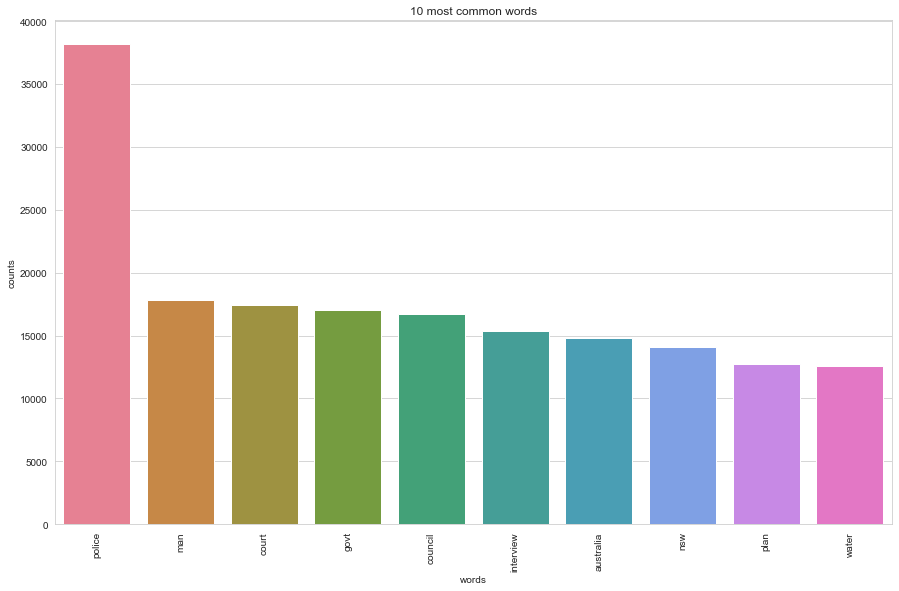

In [308]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(filtered_words)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)